# Exploring pybaseball

Have had problems getting up-to-date, relevant baseball data in the past. Found package pybaseball, a reimplementation of baseballr: https://github.com/jldbc/pybaseball

Seems promising, especially with statcast data, so I'll explore it in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pybaseball import statcast
pd.options.display.max_columns = 999

year = '2018'
saveDir = '../run/explore/'

### Load up 2017 data

In [2]:
data = statcast(start_dt='2018-03-29', end_dt='2018-10-01')

This is a large query, it may take a moment to complete


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (41,50,51,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2018-03-29 to 2018-04-03
Completed sub-query from 2018-04-04 to 2018-04-09
Completed sub-query from 2018-04-10 to 2018-04-15
Completed sub-query from 2018-04-16 to 2018-04-21
Completed sub-query from 2018-04-22 to 2018-04-27


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,14,27,28,29,30,44,45,46,47,48,49,55,56,57,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2018-04-28 to 2018-05-03
Completed sub-query from 2018-05-04 to 2018-05-09
Completed sub-query from 2018-05-10 to 2018-05-15
Completed sub-query from 2018-05-16 to 2018-05-21
Completed sub-query from 2018-05-22 to 2018-05-27
Completed sub-query from 2018-05-28 to 2018-06-02
Completed sub-query from 2018-06-03 to 2018-06-08
Completed sub-query from 2018-06-09 to 2018-06-14
Completed sub-query from 2018-06-15 to 2018-06-20
Completed sub-query from 2018-06-21 to 2018-06-26
Completed sub-query from 2018-06-27 to 2018-07-02


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,14,27,28,29,30,41,44,45,46,47,48,49,50,51,55,57,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2018-07-03 to 2018-07-08


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,14,27,28,29,30,44,45,46,47,48,49,55,57,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2018-07-09 to 2018-07-14
Completed sub-query from 2018-07-15 to 2018-07-20
Completed sub-query from 2018-07-21 to 2018-07-26
Completed sub-query from 2018-07-27 to 2018-08-01
Completed sub-query from 2018-08-02 to 2018-08-07
Completed sub-query from 2018-08-08 to 2018-08-13


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (2,3,4,14,27,28,29,30,41,44,45,46,47,48,49,50,51,55,56,57,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


Completed sub-query from 2018-08-14 to 2018-08-19
Completed sub-query from 2018-08-20 to 2018-08-25
Completed sub-query from 2018-08-26 to 2018-08-31
Completed sub-query from 2018-09-01 to 2018-09-06
Completed sub-query from 2018-09-07 to 2018-09-12
Completed sub-query from 2018-09-13 to 2018-09-18
Completed sub-query from 2018-09-19 to 2018-09-24
Completed sub-query from 2018-09-25 to 2018-09-30
Completed sub-query from 2018-10-01 to 2018-10-01


Cool, we got that (despite it taking some time), let's figure out what it looks like as a whole before diving into numbers

In [3]:
data.head(3)

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,FC,2018-10-01,92.2,-1.9690,6.2644,Kenley Jansen,467827.0,445276.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,12.0,Gerardo Parra strikes out swinging.,R,L,R,LAD,COL,S,2.0,NaN,0.0,2.0,2018.0,0.3852,1.3383,0.6340,3.5245,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518735.0,NaN,181001_233008,5.8480,-134.4517,-4.2629,3.7162,25.4123,-14.7757,3.3190,1.5130,NaN,NaN,NaN,94.061,2629.0,6.979,570335.0,445276.0,518735.0,641355.0,571771.0,457759.0,592518.0,592626.0,621035.0,624577.0,53.5199,NaN,NaN,0.0,1.0,0.0,0.0,NaN,71.0,4.0,Cutter,5.0,2.0,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard
1,1,FC,2018-10-01,93.0,-1.7689,6.2976,Kenley Jansen,467827.0,445276.0,NaN,foul,NaN,NaN,NaN,NaN,12.0,NaN,R,L,R,LAD,COL,S,NaN,NaN,0.0,2.0,2018.0,0.5206,1.2567,1.0881,2.4413,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518735.0,NaN,181001_232932,6.2441,-135.4161,-7.0758,5.3446,27.0812,-15.0090,3.3190,1.5130,NaN,NaN,NaN,94.607,2686.0,7.003,570335.0,445276.0,518735.0,641355.0,571771.0,457759.0,592518.0,592626.0,621035.0,624577.0,53.4962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,3.0,Cutter,5.0,2.0,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard
2,2,FC,2018-10-01,91.6,-1.7451,6.2154,Kenley Jansen,467827.0,445276.0,NaN,called_strike,NaN,NaN,NaN,NaN,5.0,NaN,R,L,R,LAD,COL,S,NaN,NaN,0.0,1.0,2018.0,0.6363,1.1421,-0.1730,2.4119,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,518735.0,NaN,181001_232911,2.6024,-133.5264,-6.4366,7.3371,26.6084,-16.9537,3.3633,1.6778,NaN,NaN,NaN,93.413,2581.0,7.098,570335.0,445276.0,518735.0,641355.0,571771.0,457759.0,592518.0,592626.0,621035.0,624577.0,53.4010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,2.0,Cutter,5.0,2.0,2.0,5.0,2.0,5.0,2.0,5.0,Standard,Standard


In [4]:
data.describe()

,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
count,721188.000000,718447.000000,718330.000000,718330.000000,721188.000000,721188.000000,0.0,0.0,0.0,0.0,718330.000000,129145.000000,721188.000000,721188.000000,721188.0,718330.000000,718330.000000,718330.000000,718330.000000,67142.000000,131509.000000,220054.000000,721188.000000,721188.000000,126081.000000,126081.000000,0.0,0.0,719408.000000,0.0,718330.000000,718330.000000,718330.000000,718330.000000,718330.000000,718330.000000,719408.000000,719408.000000,193252.000000,204545.000000,204547.000000,717633.000000,707446.000000,718421.000000,721188.000000,721188.000000,719408.000000,719408.000000,719408.000000,719408.000000,719408.000000,719408.000000,719408.000000,719408.000000,718330.000000,126274.000000,126274.000000,184610.000000,184603.000000,184610.000000,184610.000000,126274.000000,721188.000000,721188.000000,721188.000000,721188.000000,721188.000000,721188.000000,721188.000000,721188.000000,721188.000000,721188.000000
mean,11770.665955,88.619051,-0.763059,5.865687,550834.233289,554910.376326,NaN,NaN,NaN,NaN,9.124343,4.455310,0.884213,0.891934,2018.0,-0.147374,0.659229,0.036278,2.245998,552443.417682,552229.924408,548955.006348,0.981651,5.019546,126.768452,122.403768,NaN,NaN,529688.581242,NaN,2.314201,-128.811490,-4.136388,-2.472121,26.232610,-23.422502,3.402419,1.551113,161.359324,82.995275,16.009724,88.153066,2226.419670,5.991689,530645.653502,554910.376326,529688.581242,528901.841966,559274.687604,557031.679874,580577.764326,557915.229731,564831.335968,551426.048067,54.507960,0.319980,0.360981,0.323204,0.993364,0.191934,0.144700,3.146135,39.112857,2.909488,2.189465,2.304769,2.226578,2.267657,2.304805,2.189493,2.226641,2.267657
std,6893.386433,5.912278,1.982983,0.525664,71079.072069,73238.060555,NaN,NaN,NaN,NaN,4.201137,2.486905,0.966607,0.825736,0.0,0.872723,0.737133,0.864442,0.947350,70164.966301,70596.902542,71553.197309,0.816798,2.678078,40.269228,43.694388,NaN,NaN,64231.260172,NaN,6.067475,8.580774,3.059676,10.506762,3.827059,8.645355,0.204362,0.149810,121.818338,14.814759,29.043630,6.224771,311.478745,0.499825,1285.914275,73238.060555,64231.260172,67437.737297,63653.085295,78335.176150,55491.641114,75042.989743,62212.452969,63391.526907,0.499766,0.291041,0.384117,0.514806,0.081190,0.393823,0.560765,1.251060,23.141228,1.734199,2.620433,2.563102,2.552353,2.632007,2.563111,2.620451,2.552381,2.632007
min,0.000000,44.200000,-5.004700,0.977400,112526.000000,112526.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,2018.0,-2.775900,-4.471200,-9.670900,-4.519000,134181.000000,134181.000000,134181.000000,0.000000,1.000000,2.000000,3.080000,NaN,NaN,408045.000000,NaN,-20.095400,-152.936500,-19.110100,-31.250100,6.647900,-77.171400,2.503800,0.754100,0.000000,9.000000,-89.037000,45.843000,428.000000,2.384000,529406.000000,112526.000000,408045.000000,400121.000000,400284.000000,134181.000000,408314.000000,400085.000000,430945.000000,400085.000000,50.609700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5798.000000,84.400000,-2.200200,5.603600,501303.000000,502171.000000,NaN,NaN,NaN,NaN,5.000000,2.000000,0.000000,0.000

In [155]:
# drop bunts
data.dropna(subset=['des'])
data['des'].str.contains('bunt')
data = data[data['des'].str.contains('bunt')==False]

### Into the numbers

The motivation for looking into this is curiousity about aggregate numbers for launch speed and launch angle, and compare against outcome, so lets try to do that. Starting with launch speed.

In [156]:
launch = data.launch_speed.dropna()

round(launch.mean(),2)

88.24

In [157]:
d_hit = data[data.description == 'hit_into_play']
round(d_hit.launch_speed.dropna().mean(),2)

85.74

Balls hit into play are on average ~2 mph faster than all types, now lets compare different types

In [158]:
def launch_speed_by_bbtype(bb_type, df):
    skimmed_df = data.loc[(data['bb_type'] == bb_type) & (data['description'] == 'hit_into_play')]
    mean = round(skimmed_df.launch_speed.mean(),2)
    std = round(skimmed_df.launch_speed.std(),2)
    return mean, std

In [159]:
print "Format (mean, standard deviation)"
for bb_type in data.bb_type.dropna().unique():
    print "{0}: {1}".format(bb_type, launch_speed_by_bbtype(bb_type, data))

Format (mean, standard deviation)
ground_ball: (83.87, 14.08)
fly_ball: (89.75, 7.89)
line_drive: (91.45, 11.43)
popup: (77.07, 8.9)


What we can take from this is that the average launch speed progresses like line drive > fly ball > ground ball > pop-up

Ground balls seem to have the widest spread, fly balls the lowest.

Let's try looking at the distributions of these...

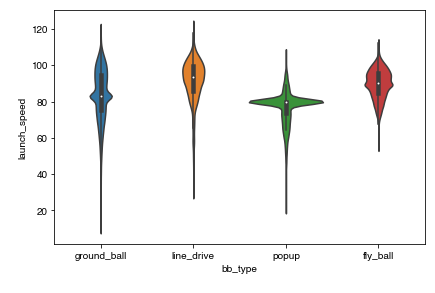

In [160]:
# create a skimmed dataframe with only the columns we want, drop nans
d_short = data[data.description == 'hit_into_play']
df_plotting = d_short[['launch_speed','bb_type']]
sns.violinplot(x="bb_type", y="launch_speed",kind='swarm', data=df_plotting)
plt.annotate('2018 Season', xy=(0.1,0.95), textcoords='figure fraction', fontsize=16)
plt.tight_layout()
plt.savefig(saveDir+'LS_bbtype_violin')

In [161]:
def plot_by_type(bb_type, df):
    df_skimmed = df[df.bb_type == bb_type]
    plt.hist(df_skimmed['launch_speed'], alpha=0.5)

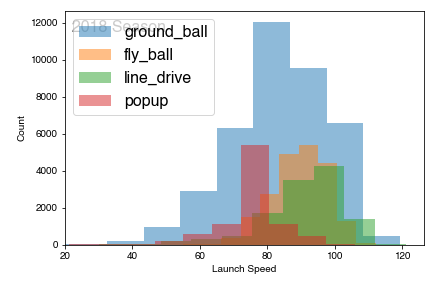

In [162]:
sns.color_palette('colorblind')
bb_types = data.bb_type.dropna().unique()
for bb_type in bb_types:
    plot_by_type(bb_type, df_plotting)
leg = plt.legend(bb_types)

plt.xlabel('Launch Speed')
plt.ylabel('Count')
# This line doesn't work for some reason...
plt.annotate('2018 Season', xy=(0.65,0.5), textcoords='figure fraction', fontsize=16)
ax = plt.gca()
ax.set_xlim(xmin=20)
plt.annotate('2018 Season', xy=(22,11500), fontsize=16)
plt.tight_layout()
plt.savefig(saveDir+'LS_bbtype_hist')

In [163]:
df_plotting.bb_type.value_counts()

ground_ball    39038
fly_ball       20629
line_drive     11858
popup           8941
Name: bb_type, dtype: int64

In [164]:
data.events.unique()

array(['strikeout', 'field_out', 'home_run', 'single',
       'grounded_into_double_play', 'walk', 'double',
       'caught_stealing_2b', 'force_out', 'hit_by_pitch', 'sac_fly',
       'double_play', 'triple', 'catcher_interf', 'field_error',
       'fielders_choice', 'pickoff_1b', 'fielders_choice_out',
       'batter_interference', nan, 'strikeout_double_play',
       'sac_fly_double_play', 'run', 'caught_stealing_home', 'other_out',
       'pickoff_caught_stealing_2b', 'caught_stealing_3b', 'pickoff_2b',
       'pickoff_caught_stealing_3b', 'triple_play',
       'pickoff_caught_stealing_home', 'pickoff_3b'], dtype=object)

Now let's repeat for event type

In [165]:
def launch_speed_by_eventtype(event, df):
    skimmed_df = data.loc[(data['events'] == event)]
    mean = round(skimmed_df.launch_speed.mean(),2)
    std = round(skimmed_df.launch_speed.std(),2)
    return mean, std

In [166]:
# okay, I don't really care about all of these, just events that get on base or in-play outs
on_base = ['single','double','triple','home_run']
# Not doing outs for now, maybe come back later
outs = ['field_out','fielders_choicce','field_error','force_out','double_play','triple_play']

print "Format (mean, standard deviation)"
for event in on_base:
    print "{0}: {1}".format(event, launch_speed_by_eventtype(event, data))

Format (mean, standard deviation)
single: (90.61, 13.08)
double: (97.21, 9.8)
triple: (98.01, 7.55)
home_run: (103.53, 4.47)


Interesting that there's not a huge difference between doubles and triples. I suspect that the difference there is more in horizontal spread (triples often fall in the corners). Maybe look more into that later.

Also interesting there's not a huge spread in home run launch speed

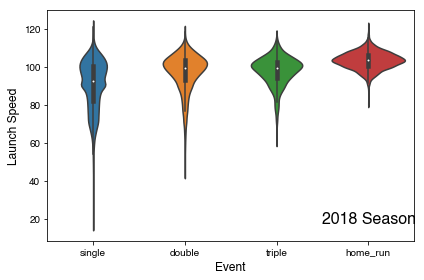

In [167]:
df_launch = data[['launch_speed','launch_angle','events']]
df_launch_base = df_launch[df_launch['events'].isin(on_base)]
sns.violinplot(x="events", y="launch_speed", data=df_launch_base, order=on_base)
plt.annotate('2018 Season', xy=(2.5,18), fontsize=16)
plt.xlabel('Event',fontsize=12); plt.ylabel('Launch Speed',fontsize=12)
plt.tight_layout()
plt.savefig(saveDir+'LS_events_violin')

This plot is pretty neat in that there seems to be a pretty clear lower limit in HR launch speed. Singles have such a huge spread, probably because of bunts/infield hits

Quick look at launch angle because I'm curious right now, but will do a more full study later...

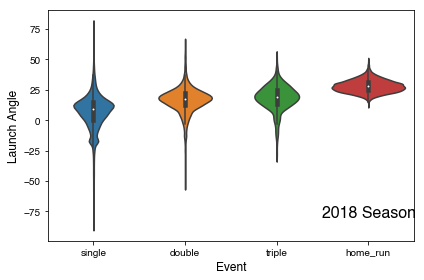

In [168]:
sns.violinplot(x="events", y="launch_angle", data=df_launch_base, order=on_base)
plt.annotate('2018 Season', xy=(2.5,-80), fontsize=16)
plt.xlabel('Event',fontsize=12); plt.ylabel('Launch Angle',fontsize=12)
plt.tight_layout()
plt.savefig(saveDir+'LA_events_violin')

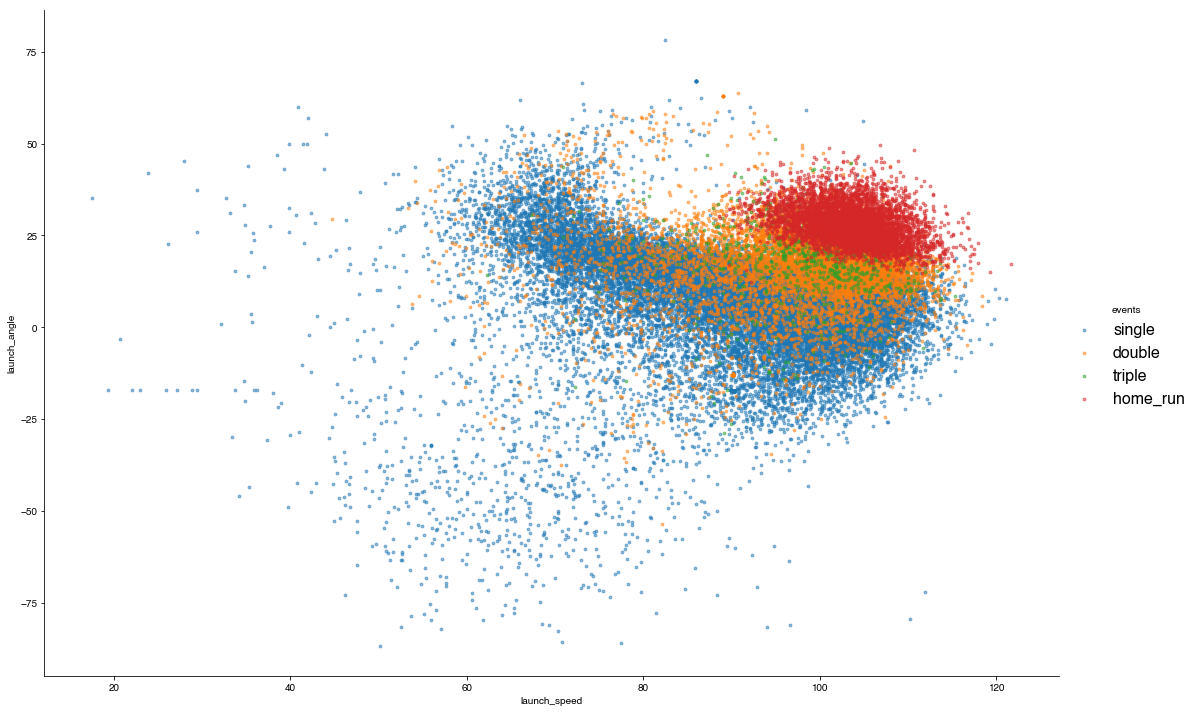

In [169]:
#plt.rc('legend',**{'fontsize':16})


g = sns.lmplot(x='launch_speed',y='launch_angle', hue='events', 
           data=df_launch_base,fit_reg=False , hue_order=on_base, size=10, aspect=1.5,
          scatter_kws={"s": 8, "alpha" : 0.5})


#plt.xlabel('Launch Speed',fontsize=16); plt.ylabel('Launch Angle',fontsize=16)


In [78]:
# Compare "out" events to "on base"
def f(row):
    if row['events'] in on_base:
        val = True
    elif row['events'] in outs:
        val = False
    else:
        print "bug"
    return val

In [170]:
df_outs_onbase = df_launch[df_launch["events"].isin(on_base+outs)]
df_outs_onbase['onbase'] = df_outs_onbase.apply(f, axis=1)
df_outs_onbase.head()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,launch_speed,launch_angle,events,onbase
10,79.9,-32.960,field_out,False
11,104.7,23.619,home_run,True
20,107.1,23.418,home_run,True
21,81.0,-11.391,field_out,False
22,65.7,-15.527,field_out,False


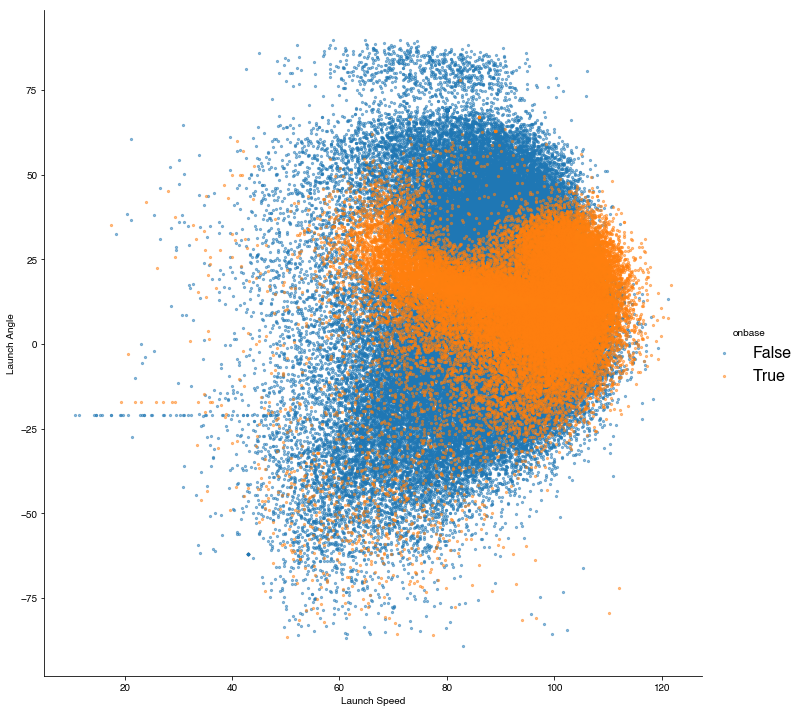

In [171]:
sns.lmplot(x='launch_speed',y='launch_angle', hue='onbase', 
           data=df_outs_onbase,fit_reg=False , size=10,
          scatter_kws={"s": 5, "alpha" : 0.5})
plt.xlabel('Launch Speed')
plt.ylabel('Launch Angle')

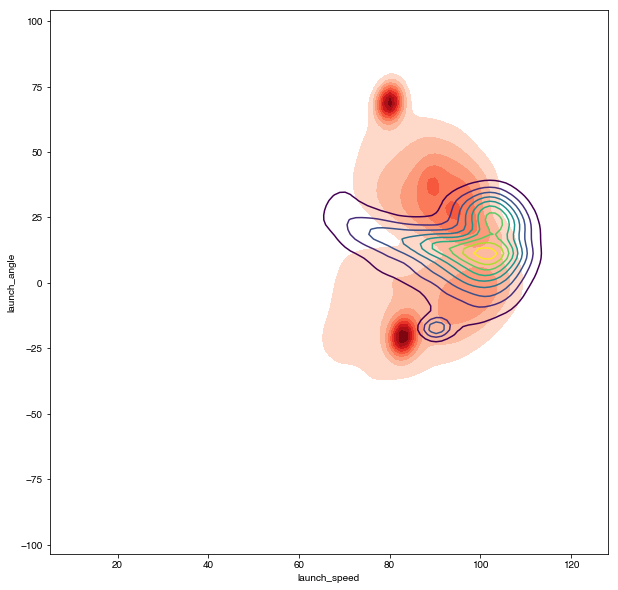

In [174]:
theOuts = df_outs_onbase.loc[df_outs_onbase.events.isin(outs)].dropna()
theHits = df_outs_onbase.loc[df_outs_onbase.events.isin(on_base)].dropna()
fig = plt.figure(figsize=(10,10))
ax = sns.kdeplot(theOuts.launch_speed, theOuts.launch_angle,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(theHits.launch_speed, theHits.launch_angle,
                 cmap="viridis", shade=False, shade_lowest=False)

In [173]:
anomoly = data[ (data['launch_speed'] > 35) & (data['launch_speed'] < 45)]
anomoly.head(20)
anomoly.describe()

,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
count,452.000000,452.000000,451.000000,451.000000,452.000000,452.000000,0.0,0.0,0.0,0.0,451.000000,307.000000,452.000000,452.000000,452.0,451.000000,451.000000,451.000000,451.000000,62.000000,99.000000,150.000000,452.000000,452.000000,345.000000,345.000000,0.0,0.0,452.000000,0.0,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,452.000000,452.000000,402.000000,452.000000,452.000000,452.000000,444.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,451.000000,345.000000,345.000000,452.000000,452.000000,452.000000,452.000000,345.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,11592.769912,88.243584,-0.629776,5.858770,551426.880531,555632.785398,NaN,NaN,NaN,NaN,9.720621,2.951140,0.858407,1.002212,2018.0,-0.221418,0.647509,-0.266728,2.677017,558783.338710,543859.191919,549654.586667,0.942478,4.929204,128.843623,178.725246,NaN,NaN,531678.524336,NaN,1.381994,-128.294253,-2.968795,-3.076667,26.195500,-23.942926,3.361768,1.483148,40.611940,41.059292,-6.130159,87.771418,2174.200450,5.986535,530653.561947,555632.785398,531678.524336,526932.232301,553314.500000,547053.561947,582164.811947,562042.785398,561780.681416,555662.422566,54.513771,0.130948,0.119684,0.310951,0.997788,0.108407,0.002212,1.040580,38.300885,3.030973,2.068584,2.296460,2.292035,2.073009,2.298673,2.068584,2.294248,2.073009
std,6873.415547,6.046181,2.069583,0.510742,65451.549593,71545.139498,NaN,NaN,NaN,NaN,3.498189,1.639252,0.972958,0.814227,0.0,0.957806,0.675815,1.180236,0.939773,65792.192502,65326.561536,71802.385042,0.821691,2.653590,13.377275,11.291365,NaN,NaN,66024.140235,NaN,6.026297,8.816712,2.780165,11.308872,3.976956,7.833526,0.194897,0.140790,36.174606,2.760214,32.196587,6.338870,316.783165,0.501687,675.174852,71545.139498,66024.140235,70805.534045,65328.751687,98429.383475,54864.752474,76914.864825,60603.295818,63760.754318,0.501834,0.028477,0.028282,0.391790,0.047036,0.311238,0.047036,0.197601,22.882185,1.759086,2.464324,2.455942,2.489647,2.430676,2.461535,2.464324,2.495168,2.430676
min,82.000000,67.900000,-4.123800,2.797200,408236.000000,112526.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,2018.0,-2.013900,-1.693900,-3.378700,0.010300,430832.000000,429664.000000,405395.000000,0.000000,1.000000,92.040000,154.530000,NaN,NaN,425772.000000,NaN,-16.606100,-144.804800,-11.301900,-24.608200,16.004300,-45.339300,2.709000,1.044900,1.000000,35.100000,-63.777400,66.796000,1216.000000,4.528000,529423.000000,112526.000000,425772.000000,405395.000000,400284.000000,134181.000000,408314.000000,400085.000000,430945.000000,425783.000000,52.967500,0.005000,0.006000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5535.000000,84.175000,-2.182700,5.608300,514917.000000,502616.250000,NaN,NaN,NaN,NaN,7.000000,1.000000,0.000000,0.000000,2018.0,-1.119700,0.328400,-1.178050,2.024850,508749.250000,491073.500000,470189.750000,0.000000,3.000000,119.860000,169.490000,NaN,NaN,459460.250000,NaN,-3.445650,-135.433200,-4.866950,-13.